In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [18]:
df_energy = pd.read_csv("ENERGY_USAGE_TYPE_COUNTY.csv")
df_energy.head()

,County,Coal,Large Hydro,Natural Gas,Nuclear,Oil,Other,Renewables,Unspecified
0,Los Angeles County,1877.0,6999.0,19578.0,7599.0,6.00,102.73,26205.0,6119.5
1,San Diego County,590.0,2370.0,6870.0,1670.0,2.99,26.00,6299.0,1972.0
2,Orange County,843.0,1956.0,5793.0,1886.0,3.00,25.00,7878.0,1813.0
3,Riverside County,490.0,1784.0,5907.0,1399.0,2.40,20.50,4818.0,1836.0
4,San Bernardino County,678.0,1814.0,5107.0,1546.0,3.90,19.50,4668.0,1798.0


In [39]:
df_energy['Total_Usage'] = (df_energy['Coal'] + 
                            df_energy['Large Hydro'] + 
                            df_energy['Natural Gas'] + 
                            df_energy['Nuclear'] + 
                            df_energy['Oil'] + 
                            df_energy['Other'] + 
                            df_energy['Renewables'] + 
                            df_energy['Unspecified'])
df_energy.head()


,County,Coal,Large Hydro,Natural Gas,Nuclear,Oil,Other,Renewables,Unspecified,Total_Usage
0,Los Angeles County,1877.0,6999.0,19578.0,7599.0,6.00,102.73,26205.0,6119.5,68486.23
1,San Diego County,590.0,2370.0,6870.0,1670.0,2.99,26.00,6299.0,1972.0,19799.99
2,Orange County,843.0,1956.0,5793.0,1886.0,3.00,25.00,7878.0,1813.0,20197.00
3,Riverside County,490.0,1784.0,5907.0,1399.0,2.40,20.50,4818.0,1836.0,16256.90
4,San Bernardino County,678.0,1814.0,5107.0,1546.0,3.90,19.50,4668.0,1798.0,15634.40


In [40]:
df_energy['Coal %'] = df_energy['Coal']/df_energy['Total_Usage']
df_energy['Large Hydro %'] = df_energy['Large Hydro']/df_energy['Total_Usage']
df_energy['Natural Gas %'] = df_energy['Natural Gas']/df_energy['Total_Usage']
df_energy['Nuclear %'] = df_energy['Nuclear']/df_energy['Total_Usage']
df_energy['Oil %'] = df_energy['Oil']/df_energy['Total_Usage']
df_energy['Other %'] = df_energy['Other']/df_energy['Total_Usage']
df_energy['Renewables %'] = df_energy['Renewables']/df_energy['Total_Usage']
df_energy['Unspecified %'] = df_energy['Unspecified']/df_energy['Total_Usage']
df_energyPercentage = df_energy
df_energyPercentage.head()


,County,Coal,Large Hydro,Natural Gas,Nuclear,Oil,Other,Renewables,Unspecified,Total_Usage,Coal %,Large Hydro %,Natural Gas %,Nuclear %,Oil %,Other %,Renewables %,Unspecified %
0,Los Angeles County,1877.0,6999.0,19578.0,7599.0,6.00,102.73,26205.0,6119.5,68486.23,0.027407,0.102196,0.285868,0.110957,0.000088,0.001500,0.382632,0.089354
1,San Diego County,590.0,2370.0,6870.0,1670.0,2.99,26.00,6299.0,1972.0,19799.99,0.029798,0.119697,0.346970,0.084343,0.000151,0.001313,0.318131,0.099596
2,Orange County,843.0,1956.0,5793.0,1886.0,3.00,25.00,7878.0,1813.0,20197.00,0.041739,0.096846,0.286825,0.093380,0.000149,0.001238,0.390058,0.089766
3,Riverside County,490.0,1784.0,5907.0,1399.0,2.40,20.50,4818.0,1836.0,16256.90,0.030141,0.109738,0.363353,0.086056,0.000148,0.001261,0.296366,0.112937
4,San Bernardino County,678.0,1814.0,5107.0,1546.0,3.90,19.50,4668.0,1798.0,15634.40,0.043366,0.116026,0.326651,0.098885,0.000249,0.001247,0.298572,0.115003


In [9]:
df_geo = pd.read_csv("geocodes.csv")
df_geo.head()


,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
0,10,0,0,0,0,0,United States
1,40,1,0,0,0,0,Alabama
2,50,1,1,0,0,0,Autauga County
3,50,1,3,0,0,0,Baldwin County
4,50,1,5,0,0,0,Barbour County


In [14]:
ca_code = df_geo.loc[df_geo['Area Name (including legal/statistical area description)'] == 'California']
ca_code

#state code equals 6

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
1393,40,6,0,0,0,0,California


In [21]:
#pulling only california state/county code
fips = df_geo[['State Code (FIPS)','County Code (FIPS)','Area Name (including legal/statistical area description)']].loc[df_geo['State Code (FIPS)']==6].rename(columns = {'Area Name (including legal/statistical area description)': 'County'})
fips

,State Code (FIPS),County Code (FIPS),County
1393,6,0,California
1394,6,1,Alameda County
1395,6,3,Alpine County
1396,6,5,Amador County
1397,6,7,Butte County
...,...,...,...
1929,6,0,Yountville city
1930,6,0,Yreka city
1931,6,0,Yuba City city
1932,6,0,Yucaipa city


In [37]:
fips_county = fips.loc[fips["County Code (FIPS)"] > 0]
fips_county.head()

,State Code (FIPS),County Code (FIPS),County
1394,6,1,Alameda County
1395,6,3,Alpine County
1396,6,5,Amador County
1397,6,7,Butte County
1398,6,9,Calaveras County


In [43]:
energy_countyCodes = pd.merge(fips_county, df_energyPercentage,
                           how = 'inner', on = 'County')
energy_countyCodes = energy_countyCodes.rename(columns = {'County Code (FIPS)': 'COUNTY'})
energy_countyCodes.head()

,State Code (FIPS),COUNTY,County,Coal,Large Hydro,Natural Gas,Nuclear,Oil,Other,Renewables,Unspecified,Total_Usage,Coal %,Large Hydro %,Natural Gas %,Nuclear %,Oil %,Other %,Renewables %,Unspecified %
0,6,1,Alameda County,267.0,958.0,3631.00,787.00,1.04,17.00,3961.0,795.0,10417.04,0.025631,0.091965,0.348564,0.075549,0.000100,0.001632,0.380242,0.076317
1,6,3,Alpine County,1.0,1.9,6.33,1.88,0.00,0.03,5.3,2.2,18.64,0.053648,0.101931,0.339592,0.100858,0.000000,0.001609,0.284335,0.118026
2,6,5,Amador County,11.0,28.0,95.00,31.00,0.03,0.45,92.0,43.0,300.48,0.036608,0.093184,0.316161,0.103168,0.000100,0.001498,0.306177,0.143104
3,6,7,Butte County,65.0,166.0,513.00,125.00,0.15,2.22,477.0,130.0,1478.37,0.043967,0.112286,0.347004,0.084553,0.000101,0.001502,0.322653,0.087935
4,6,9,Calaveras County,15.0,41.0,108.00,28.00,0.03,0.50,107.0,33.0,332.53,0.045109,0.123297,0.324783,0.084203,0.000090,0.001504,0.321775,0.099239


In [42]:
car_percentage = pd.read_csv("electric_vehicle_county.csv")
car_percentage.head()

,COUNTY,Battery Electric % Unadj,Battery Electric % adj,Hybrid Gasoline % Unadj,Hybrid Gasoline % adj,Plug Electric % Unadj,Plug Electric % adj,% Unadj Low Emission,% Adj Low Emission
0,1,0.015331,0.015339,0.052245,0.051540,0.015331,0.015339,0.082906,0.082218
1,3,0.001779,0.001364,0.016459,0.016484,0.001779,0.001364,0.020018,0.019212
2,5,0.001197,0.001149,0.017245,0.017088,0.001197,0.001149,0.019639,0.019385
3,7,0.001370,0.001454,0.022598,0.023631,0.001370,0.001454,0.025339,0.026539
4,9,0.001587,0.001549,0.018363,0.018612,0.001587,0.001549,0.021536,0.021710


In [45]:
energyAndCar = pd.merge(energy_countyCodes,car_percentage, on = 'COUNTY',how = 'inner')
energyAndCar.head()



,State Code (FIPS),COUNTY,County,Coal,Large Hydro,Natural Gas,Nuclear,Oil,Other,Renewables,...,Renewables %,Unspecified %,Battery Electric % Unadj,Battery Electric % adj,Hybrid Gasoline % Unadj,Hybrid Gasoline % adj,Plug Electric % Unadj,Plug Electric % adj,% Unadj Low Emission,% Adj Low Emission
0,6,1,Alameda County,267.0,958.0,3631.00,787.00,1.04,17.00,3961.0,...,0.380242,0.076317,0.015331,0.015339,0.052245,0.051540,0.015331,0.015339,0.082906,0.082218
1,6,3,Alpine County,1.0,1.9,6.33,1.88,0.00,0.03,5.3,...,0.284335,0.118026,0.001779,0.001364,0.016459,0.016484,0.001779,0.001364,0.020018,0.019212
2,6,5,Amador County,11.0,28.0,95.00,31.00,0.03,0.45,92.0,...,0.306177,0.143104,0.001197,0.001149,0.017245,0.017088,0.001197,0.001149,0.019639,0.019385
3,6,7,Butte County,65.0,166.0,513.00,125.00,0.15,2.22,477.0,...,0.322653,0.087935,0.001370,0.001454,0.022598,0.023631,0.001370,0.001454,0.025339,0.026539
4,6,9,Calaveras County,15.0,41.0,108.00,28.00,0.03,0.50,107.0,...,0.321775,0.099239,0.001587,0.001549,0.018363,0.018612,0.001587,0.001549,0.021536,0.021710


In [50]:
sortedDown_NRGandCAR = energyAndCar.sort_values(["% Adj Low Emission"], 
                                                ascending = False).reset_index()
sortedDown_NRGandCAR.head()


,index,State Code (FIPS),COUNTY,County,Coal,Large Hydro,Natural Gas,Nuclear,Oil,Other,...,Renewables %,Unspecified %,Battery Electric % Unadj,Battery Electric % adj,Hybrid Gasoline % Unadj,Hybrid Gasoline % adj,Plug Electric % Unadj,Plug Electric % adj,% Unadj Low Emission,% Adj Low Emission
0,37,6,75,San Francisco County,197.0,627.0,1703.0,503.0,0.56,8.46,...,0.371807,0.089361,0.014100,0.014100,0.074846,0.074846,0.014100,0.014100,0.103046,0.103046
1,20,6,41,Marin County,53.0,99.0,429.0,108.0,0.13,1.99,...,0.402522,0.077495,0.016583,0.016946,0.065715,0.066633,0.016583,0.016946,0.098882,0.100525
2,42,6,85,Santa Clara County,654.0,1304.0,5699.0,1296.0,2.40,31.60,...,0.379077,0.083069,0.020393,0.021234,0.047124,0.048145,0.020393,0.021234,0.087911,0.090614
3,40,6,81,San Mateo County,269.0,466.0,1167.0,312.0,0.43,6.38,...,0.370169,0.107878,0.015775,0.015431,0.054039,0.053847,0.015775,0.015431,0.085589,0.084710
4,0,6,1,Alameda County,267.0,958.0,3631.0,787.0,1.04,17.00,...,0.380242,0.076317,0.015331,0.015339,0.052245,0.051540,0.015331,0.015339,0.082906,0.082218


In [51]:
topTen_EVCounty = sortedDown_NRGandCAR.head(10)

topTen_EVCounty

,index,State Code (FIPS),COUNTY,County,Coal,Large Hydro,Natural Gas,Nuclear,Oil,Other,...,Renewables %,Unspecified %,Battery Electric % Unadj,Battery Electric % adj,Hybrid Gasoline % Unadj,Hybrid Gasoline % adj,Plug Electric % Unadj,Plug Electric % adj,% Unadj Low Emission,% Adj Low Emission
0,37,6,75,San Francisco County,197.0,627.0,1703.0,503.0,0.56,8.46,...,0.371807,0.089361,0.014100,0.014100,0.074846,0.074846,0.014100,0.014100,0.103046,0.103046
1,20,6,41,Marin County,53.0,99.0,429.0,108.0,0.13,1.99,...,0.402522,0.077495,0.016583,0.016946,0.065715,0.066633,0.016583,0.016946,0.098882,0.100525
2,42,6,85,Santa Clara County,654.0,1304.0,5699.0,1296.0,2.40,31.60,...,0.379077,0.083069,0.020393,0.021234,0.047124,0.048145,0.020393,0.021234,0.087911,0.090614
3,40,6,81,San Mateo County,269.0,466.0,1167.0,312.0,0.43,6.38,...,0.370169,0.107878,0.015775,0.015431,0.054039,0.053847,0.015775,0.015431,0.085589,0.084710
4,0,6,1,Alameda County,267.0,958.0,3631.0,787.0,1.04,17.00,...,0.380242,0.076317,0.015331,0.015339,0.052245,0.051540,0.015331,0.015339,0.082906,0.082218
5,43,6,87,Santa Cruz County,52.0,117.0,378.0,87.0,0.12,1.82,...,0.380068,0.095635,0.009033,0.010191,0.046107,0.051759,0.009033,0.010191,0.064173,0.072141
6,6,6,13,Contra Costa County,314.0,778.0,2951.0,805.0,1.40,17.00,...,0.386772,0.090544,0.010692,0.010216,0.047636,0.046194,0.010692,0.010216,0.069020,0.066626
7,48,6,97,Sonoma County,141.0,313.0,867.0,249.0,0.29,4.39,...,0.372992,0.089149,0.008041,0.007979,0.043262,0.043207,0.008041,0.007979,0.059345,0.059166
8,29,6,59,Orange County,843.0,1956.0,5793.0,1886.0,3.00,25.00,...,0.390058,0.089766,0.009736,0.009840,0.035108,0.035163,0.009736,0.009840,0.054581,0.054843
9,18,6,37,Los Angeles County,1877.0,6999.0,19578.0,7599.0,6.00,102.73,...,0.382632,0.089354,0.007003,0.006974,0.038594,0.038631,0.007003,0.006974,0.052599,0.052579


In [52]:
sortedUp_NRGandCAR = energyAndCar.sort_values(["% Adj Low Emission"], 
                                              ascending = True).reset_index()

sortedUp_NRGandCAR.head()


,index,State Code (FIPS),COUNTY,County,Coal,Large Hydro,Natural Gas,Nuclear,Oil,Other,...,Renewables %,Unspecified %,Battery Electric % Unadj,Battery Electric % adj,Hybrid Gasoline % Unadj,Hybrid Gasoline % adj,Plug Electric % Unadj,Plug Electric % adj,% Unadj Low Emission,% Adj Low Emission
0,17,6,35,Lassen County,16.6,38.9,149.0,33.0,0.04,0.61,...,0.329550,0.089100,0.000356,0.000324,0.007051,0.006964,0.000356,0.000324,0.007763,0.007612
1,24,6,49,Modoc County,6.1,13.4,58.3,11.3,0.01,0.22,...,0.293463,0.103893,0.000710,0.000683,0.007174,0.007478,0.000710,0.000683,0.008594,0.008844
2,31,6,63,Plumas County,5.5,23.0,68.0,21.0,0.02,0.31,...,0.306525,0.120177,0.000651,0.000674,0.008533,0.008570,0.000651,0.000674,0.009834,0.009919
3,12,6,25,Imperial County,28.0,144.0,519.0,134.0,0.14,2.14,...,0.322992,0.097388,0.000759,0.000761,0.008732,0.008671,0.000759,0.000761,0.010250,0.010194
4,10,6,21,Glenn County,18.0,38.0,155.0,29.0,0.04,0.61,...,0.284156,0.105290,0.000583,0.000580,0.010283,0.010186,0.000583,0.000580,0.011450,0.011346


In [55]:
Bottom_EVCounty = sortedUp_NRGandCAR.head(40)

Bottom_EVCounty.head()

,index,State Code (FIPS),COUNTY,County,Coal,Large Hydro,Natural Gas,Nuclear,Oil,Other,...,Renewables %,Unspecified %,Battery Electric % Unadj,Battery Electric % adj,Hybrid Gasoline % Unadj,Hybrid Gasoline % adj,Plug Electric % Unadj,Plug Electric % adj,% Unadj Low Emission,% Adj Low Emission
0,17,6,35,Lassen County,16.6,38.9,149.0,33.0,0.04,0.61,...,0.329550,0.089100,0.000356,0.000324,0.007051,0.006964,0.000356,0.000324,0.007763,0.007612
1,24,6,49,Modoc County,6.1,13.4,58.3,11.3,0.01,0.22,...,0.293463,0.103893,0.000710,0.000683,0.007174,0.007478,0.000710,0.000683,0.008594,0.008844
2,31,6,63,Plumas County,5.5,23.0,68.0,21.0,0.02,0.31,...,0.306525,0.120177,0.000651,0.000674,0.008533,0.008570,0.000651,0.000674,0.009834,0.009919
3,12,6,25,Imperial County,28.0,144.0,519.0,134.0,0.14,2.14,...,0.322992,0.097388,0.000759,0.000761,0.008732,0.008671,0.000759,0.000761,0.010250,0.010194
4,10,6,21,Glenn County,18.0,38.0,155.0,29.0,0.04,0.61,...,0.284156,0.105290,0.000583,0.000580,0.010283,0.010186,0.000583,0.000580,0.011450,0.011346


In [61]:
cleanTop = topTen_EVCounty[["COUNTY", "County","Renewables %","% Adj Low Emission"]]
cleanTop.head()

,COUNTY,County,Renewables %,% Adj Low Emission
0,75,San Francisco County,0.371807,0.103046
1,41,Marin County,0.402522,0.100525
2,85,Santa Clara County,0.379077,0.090614
3,81,San Mateo County,0.370169,0.084710
4,1,Alameda County,0.380242,0.082218


In [62]:
cleanBottom = Bottom_EVCounty[["COUNTY", "County","Renewables %","% Adj Low Emission"]]
cleanBottom.head()

,COUNTY,County,Renewables %,% Adj Low Emission
0,35,Lassen County,0.329550,0.007612
1,49,Modoc County,0.293463,0.008844
2,63,Plumas County,0.306525,0.009919
3,25,Imperial County,0.322992,0.010194
4,21,Glenn County,0.284156,0.011346


In [60]:
stats.ttest_ind(cleanTop['% Adj Low Emission'], 
                cleanBottom['% Adj Low Emission'], 
                equal_var=False)



Ttest_indResult(statistic=9.222808382516424, pvalue=3.344905570696924e-06)

In [63]:
topEVaverage = topTen_EVCounty['Renewables %'].mean()
topEVaverage

0.38163391895439486

In [64]:
bottomEVaverage = Bottom_EVCounty['Renewables %'].mean()
bottomEVaverage

0.3135976197317883

Text(0, 0.5, 'Average Percent Renewable NGR Used')

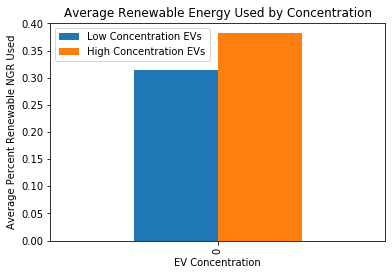

In [69]:
renew_pect = pd.DataFrame({"Low Concentration EVs": [bottomEVaverage], 
                           "High Concentration EVs": [topEVaverage]})

renew_pect
chart = renew_pect.plot(kind='bar', title = 'Average Renewable Energy Used by Concentration')
chart.set_xlabel("EV Concentration")
chart.set_ylabel("Average Percent Renewable NGR Used")


In [73]:
Coal = 0
Large_Hydro = 0
Natural_Gas = 0
Nuclear = 0
Oil = 0
Other = 0
Renewables = 0
Unspecified = 0


for i in range(len(df_energy)):
    Coal += df.iloc[i,1]
    Large_Hydro += df.iloc[i,2]
    Natural_Gas += df.iloc[i,3]
    Nuclear += df.iloc[i,4]
    Oil += df.iloc[i,5]
    Other += df.iloc[i,6]
    Renewables += df.iloc[i,7]
    Unspecified += df.iloc[i,8]
    
print(Coal)
print(Large_Hydro)
print(Natural_Gas)
print(Nuclear)
print(Oil)
print(Other)
print(Renewables)
print(Unspecified)

9793.810000000001
28940.770000000004
92865.02
26640.360000000004
36.04999999999998
420.86000000000007
98775.59999999999
26951.430000000004


Text(0.5, 1.0, 'Energy Usage in CA')

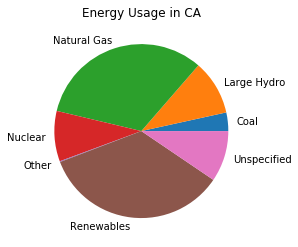

In [82]:
pie_df = pd.DataFrame({"Usage": [Coal,
                               Large_Hydro,
                               Natural_Gas,
                               Nuclear,
                               Other,
                               Renewables,
                               Unspecified]},
                      index = ["Coal", 
                              "Large Hydro", 
                              "Natural Gas", 
                              "Nuclear",  
                              "Other", 
                              "Renewables",
                              "Unspecified"])
                      

pie_chart = pie_df.plot.pie(y="Usage", legend = None)

pie_chart.set_ylabel("")
pie_chart.set_title("Energy Usage in CA")


